In [5]:
# !pip3 install pandas
# !pip3 install seaborn 
# !pip3 install matplotlib

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Determine the «survival» rates independently for men and women for age groups; 0-4,	5-9,	10-14,	15-19, 	20-24, 	25-29,	30-34,	35-39,	40-44,	45-49,	50-54,	55-59,	60-64,	65-69,	70-74,	75-79,	80-84,	85-89,	90-94,	95-99, and	100+ according to 2000-2005 population data from the UN. 

Country Nigeria.

<!-- Equations for modeling -->

In [78]:
'''
    Survival Rate (SR) = Population at the end of the age groupb (PEG) / Population at the beginning of the age group (PBG)
    SR = PEG/PBG
'''

'\n    Survival Rate (SR) = Population at the end of the age groupb (PEG) / Population at the beginning of the age group (PBG)\n    SR = PEG/PBG\n'

<!-- Input/OUTPUT Data & Parameters -->

In [79]:
'''
    Input data: Population estimates for each age group 
    for female, and male from 2000 to 2005

    Output data: Survival rates for each age group for females and males

    Parameters: None, as we only using the given data to compute survival rates
'''

'\n    Input data: Population estimates for each age group \n    for female, and male from 2000 to 2005\n\n    Output data: Survival rates for each age group for females and males\n\n    Parameters: None, as we only using the given data to compute survival rates\n'

## Import data into pandas
Source: https://population.un.org/wpp/Download/Standard/Population/

In [7]:
# Input data for female and male population estimates
female_data = [
    [2000, 10552, 8483, 7258, 6547, 5626, 4528, 3667, 3098, 2602, 2178, 1802, 1528, 1201, 882, 590, 341, 156, 51, 11, 1, 0],
    [2001, 10869, 8728, 7406, 6660, 5799, 4709, 3778, 3175, 2667, 2232, 1834, 1566, 1230, 904, 604, 349, 160, 52, 11, 1, 0],
    [2002, 11218, 8975, 7577, 6761, 5961, 4894, 3904, 3252, 2734, 2288, 1871, 1601, 1259, 927, 618, 357, 163, 53, 11, 1, 0],
    [2003, 11592, 9220, 7772, 6855, 6110, 5085, 4041, 3332, 2804, 2345, 1917, 1627, 1289, 952, 633, 365, 167, 55, 11, 1, 0],
    [2004, 11968, 9479, 7982, 6960, 6245, 5273, 4194, 3417, 2875, 2403, 1980, 1639, 1321, 976, 649, 373, 171, 56, 12, 1, 0],
    [2005, 12332, 9765, 8206, 7084, 6364, 5447, 4359, 3510, 2946, 2462, 2041, 1655, 1354, 1001, 665, 382, 175, 58, 12, 1, 0],
]

male_data = [
    [2000, 10871, 8705, 7423, 6682, 5730, 4588, 3703, 3116, 2593, 2137, 1778, 1492, 1141, 814, 526, 289, 122, 34, 6, 0, 0],
    [2001, 11197, 8960, 7585, 6797, 5904, 4773, 3818, 3197, 2661, 2195, 1796, 1530, 1170, 835, 539, 296, 125, 36, 6, 0, 0],
    [2002, 11555, 9216, 7771, 6902, 6069, 4962, 3948, 3279, 2733, 2253, 1821, 1565, 1199, 858, 553, 304, 129, 37, 7, 0, 0],
    [2003, 11937, 9480, 7981, 7011, 6218, 5154, 4089, 3364, 2807, 2313, 1851, 1592, 1230, 880, 568, 311, 133, 38, 7, 0, 0],
    [2004, 12322, 9750, 8215, 7125, 6356, 5336, 4246, 3456, 2883, 2375, 1900, 1599, 1262, 903, 583, 319, 137, 39, 7, 0, 0],
    [2005, 12702, 10036, 8463, 7250, 6487, 5509, 4417, 3551, 2961, 2438, 1950, 1607, 1294, 927, 598, 327, 141, 40, 8, 0, 0],
]

# Create DataFrames
female_df = pd.DataFrame(female_data, columns=["Year"] + [f"{i}-{i+4}" for i in range(0, 100, 5)] + ["100+"])
male_df = pd.DataFrame(male_data, columns=["Year"] + [f"{i}-{i+4}" for i in range(0, 100, 5)] + ["100+"])


In [8]:
female_df

,Year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,2000,10552,8483,7258,6547,5626,4528,3667,3098,2602,...,1528,1201,882,590,341,156,51,11,1,0
1,2001,10869,8728,7406,6660,5799,4709,3778,3175,2667,...,1566,1230,904,604,349,160,52,11,1,0
2,2002,11218,8975,7577,6761,5961,4894,3904,3252,2734,...,1601,1259,927,618,357,163,53,11,1,0
3,2003,11592,9220,7772,6855,6110,5085,4041,3332,2804,...,1627,1289,952,633,365,167,55,11,1,0
4,2004,11968,9479,7982,6960,6245,5273,4194,3417,2875,...,1639,1321,976,649,373,171,56,12,1,0
5,2005,12332,9765,8206,7084,6364,5447,4359,3510,2946,...,1655,1354,1001,665,382,175,58,12,1,0


In [9]:
male_df

,Year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100+
0,2000,10871,8705,7423,6682,5730,4588,3703,3116,2593,...,1492,1141,814,526,289,122,34,6,0,0
1,2001,11197,8960,7585,6797,5904,4773,3818,3197,2661,...,1530,1170,835,539,296,125,36,6,0,0
2,2002,11555,9216,7771,6902,6069,4962,3948,3279,2733,...,1565,1199,858,553,304,129,37,7,0,0
3,2003,11937,9480,7981,7011,6218,5154,4089,3364,2807,...,1592,1230,880,568,311,133,38,7,0,0
4,2004,12322,9750,8215,7125,6356,5336,4246,3456,2883,...,1599,1262,903,583,319,137,39,7,0,0
5,2005,12702,10036,8463,7250,6487,5509,4417,3551,2961,...,1607,1294,927,598,327,141,40,8,0,0


## Now that we have the data in pandas DataFrames, let's compute the survival rates using our mathematical formulas: Survival Rate (SR) = Population at the end of the age groupb (PEG) / Population at the beginning of the age group (PBG) i.e. SR = PEG/PBG

In [10]:
def calculate_survival_rates(df):
    survival_rates = []
    for i in range(df.shape[0]):
        rates = []
        for j in range(1, df.shape[1] - 1):
            with np.errstate(divide='ignore', invalid='ignore'):
                rate = np.divide(df.iloc[i, j+1], df.iloc[i, j])
                if np.isnan(rate):
                    rate = 0
            rates.append(rate)
        survival_rates.append(rates)
    return survival_rates

female_survival_rates = calculate_survival_rates(female_df)
male_survival_rates = calculate_survival_rates(male_df)

# Convert the survival rates into DataFrames
female_sr_df = pd.DataFrame(female_survival_rates, columns=[f"SR_{i}-{i+4}" for i in range(0, 100, 5)])
male_sr_df = pd.DataFrame(male_survival_rates, columns=[f"SR_{i}-{i+4}" for i in range(0, 100, 5)])

# Add the year column to the survival rate DataFrames
female_sr_df["Year"] = female_df["Year"]
male_sr_df["Year"] = male_df["Year"]

# Rearrange the columns so that the year comes first
female_sr_df = female_sr_df[["Year"] + [f"SR_{i}-{i+4}" for i in range(0, 100, 5)]]
male_sr_df = male_sr_df[["Year"] + [f"SR_{i}-{i+4}" for i in range(0, 100, 5)]]


In [11]:
# Display the survival rate DataFrames
print("Female Survival Rates:")
female_sr_df

Female Survival Rates:


,Year,SR_0-4,SR_5-9,SR_10-14,SR_15-19,SR_20-24,SR_25-29,SR_30-34,SR_35-39,SR_40-44,...,SR_50-54,SR_55-59,SR_60-64,SR_65-69,SR_70-74,SR_75-79,SR_80-84,SR_85-89,SR_90-94,SR_95-99
0,2000,0.803923,0.855594,0.902039,0.859325,0.804835,0.809850,0.844832,0.839897,0.837048,...,0.847947,0.785995,0.734388,0.668934,0.577966,0.457478,0.326923,0.215686,0.090909,0.0
1,2001,0.803018,0.848533,0.899271,0.870721,0.812037,0.802293,0.840392,0.840000,0.836895,...,0.853871,0.785441,0.734959,0.668142,0.577815,0.458453,0.325000,0.211538,0.090909,0.0
2,2002,0.800053,0.844234,0.892306,0.881674,0.821003,0.797711,0.832992,0.840713,0.836869,...,0.855692,0.786384,0.736299,0.666667,0.577670,0.456583,0.325153,0.207547,0.090909,0.0
3,2003,0.795376,0.842950,0.882012,0.891320,0.832242,0.794690,0.824548,0.841537,0.836305,...,0.848722,0.792256,0.738557,0.664916,0.576619,0.457534,0.329341,0.200000,0.090909,0.0
4,2004,0.792029,0.842072,0.871962,0.897270,0.844355,0.795373,0.814735,0.841381,0.835826,...,0.827778,0.805979,0.738834,0.664959,0.574730,0.458445,0.327485,0.214286,0.083333,0.0
5,2005,0.791842,0.840348,0.863271,0.898363,0.855908,0.800257,0.805231,0.839316,0.835709,...,0.810877,0.818127,0.739291,0.664336,0.574436,0.458115,0.331429,0.206897,0.083333,0.0


In [12]:
print("Male Survival Rates:")
male_sr_df

Male Survival Rates:


,Year,SR_0-4,SR_5-9,SR_10-14,SR_15-19,SR_20-24,SR_25-29,SR_30-34,SR_35-39,SR_40-44,...,SR_50-54,SR_55-59,SR_60-64,SR_65-69,SR_70-74,SR_75-79,SR_80-84,SR_85-89,SR_90-94,SR_95-99
0,2000,0.800754,0.852728,0.900175,0.857528,0.800698,0.807105,0.841480,0.832157,0.824142,...,0.839145,0.764745,0.713409,0.646192,0.549430,0.422145,0.278689,0.176471,0.0,0
1,2001,0.800214,0.846540,0.896111,0.868619,0.808435,0.799916,0.837349,0.832343,0.824878,...,0.851893,0.764706,0.713675,0.645509,0.549165,0.422297,0.288000,0.166667,0.0,0
2,2002,0.797577,0.843207,0.888174,0.879310,0.817598,0.795647,0.830547,0.833486,0.824369,...,0.859418,0.766134,0.715596,0.644522,0.549729,0.424342,0.286822,0.189189,0.0,0
3,2003,0.794169,0.841878,0.878461,0.886892,0.828884,0.793364,0.822695,0.834423,0.824011,...,0.860076,0.772613,0.715447,0.645455,0.547535,0.427653,0.285714,0.184211,0.0,0
4,2004,0.791268,0.842564,0.867316,0.892070,0.839522,0.795727,0.813943,0.834201,0.823795,...,0.841579,0.789243,0.715531,0.645626,0.547170,0.429467,0.284672,0.179487,0.0,0
5,2005,0.790112,0.843264,0.856670,0.894759,0.849237,0.801779,0.803939,0.833850,0.823370,...,0.824103,0.805227,0.716383,0.645092,0.546823,0.431193,0.283688,0.200000,0.0,0


#Let's visualize survival rates

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_21018/217016329.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


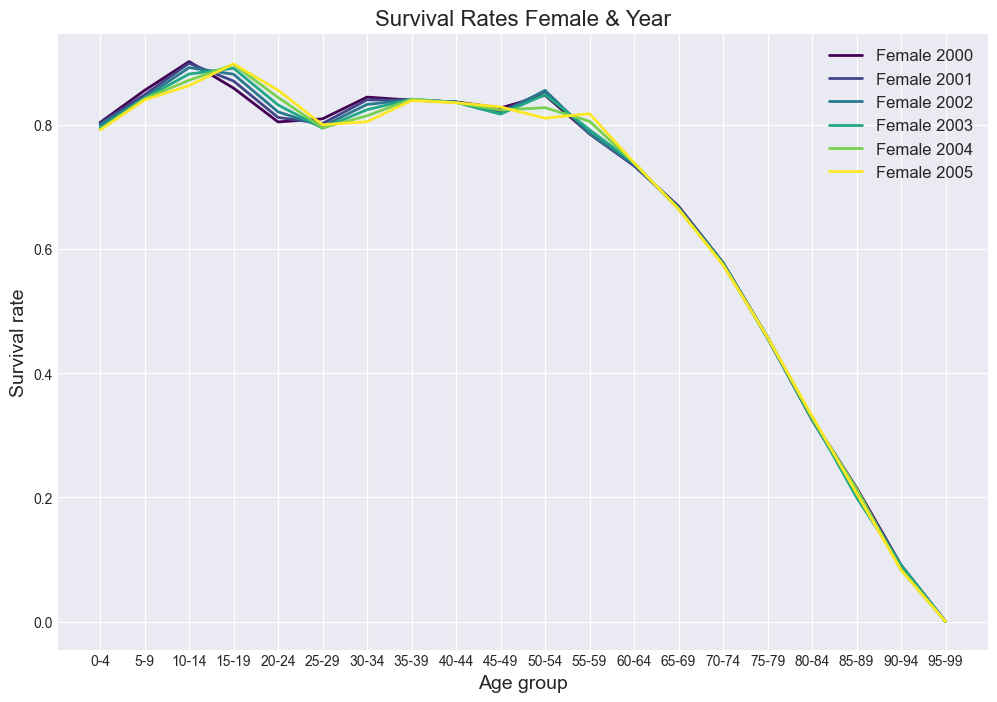

In [13]:
# Set the plot style to 'seaborn-darkgrid'
plt.style.use('seaborn-darkgrid')

# Set the plot size
plt.figure(figsize=(12, 8))

# Define colors for the lines
colors = plt.cm.viridis(np.linspace(0, 1, len(female_sr_df)))

# Plot survival rates for females
for i, color in enumerate(colors):
    plt.plot(range(0, 100, 5), female_sr_df.iloc[i, 1:], label=f"Female {female_sr_df.iloc[i, 0]}", color=color, linewidth=2)

# Plot survival rates for males
# for i, color in enumerate(colors):
#     plt.plot(range(0, 100, 5), male_sr_df.iloc[i, 1:], label=f"Male {male_sr_df.iloc[i, 0]}", color=color, linestyle='--', linewidth=2)

# Customize the x-axis tick labels
plt.xticks(range(0, 100, 5), [f"{i}-{i+4}" for i in range(0, 100, 5)])

# Add labels, title, and legend
plt.xlabel("Age group", fontsize=14)
plt.ylabel("Survival rate", fontsize=14)
plt.title("Survival Rates Female & Year", fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.show()


/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_21018/3275757701.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


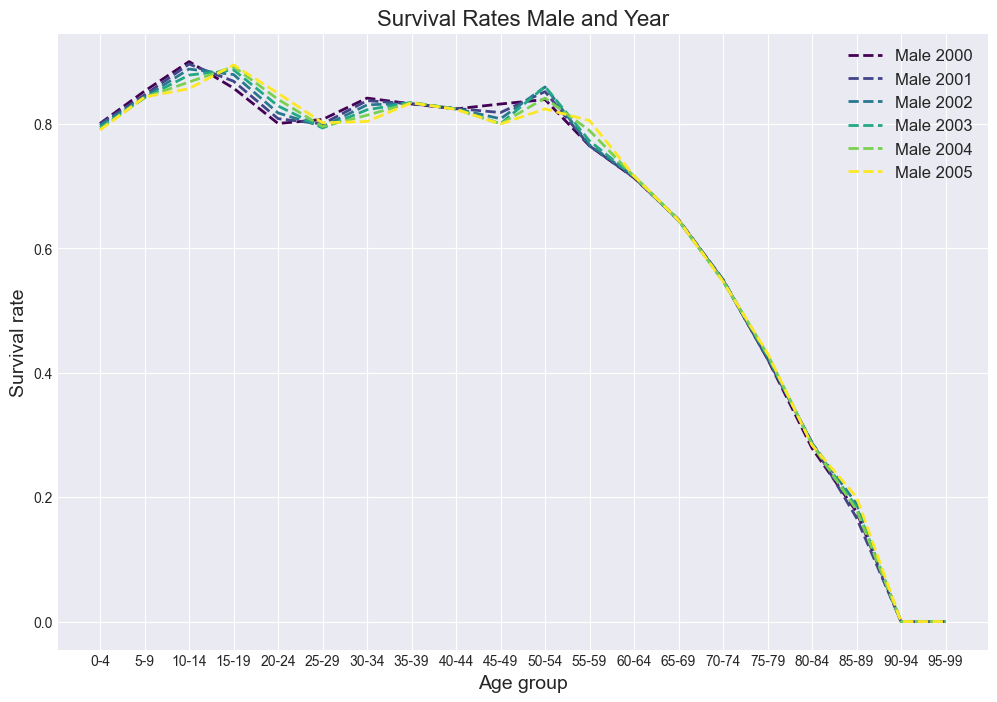

In [14]:
import matplotlib.pyplot as plt

# Set the plot style to 'seaborn-darkgrid'
plt.style.use('seaborn-darkgrid')

# Set the plot size
plt.figure(figsize=(12, 8))

# Define colors for the lines
colors = plt.cm.viridis(np.linspace(0, 1, len(male_sr_df)))

# Plot survival rates for males
for i, color in enumerate(colors):
    plt.plot(range(0, 100, 5), male_sr_df.iloc[i, 1:], label=f"Male {male_sr_df.iloc[i, 0]}", color=color, linestyle='--', linewidth=2)

# Customize the x-axis tick labels
plt.xticks(range(0, 100, 5), [f"{i}-{i+4}" for i in range(0, 100, 5)])

# Add labels, title, and legend
plt.xlabel("Age group", fontsize=14)
plt.ylabel("Survival rate", fontsize=14)
plt.title("Survival Rates Male and Year", fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.show()


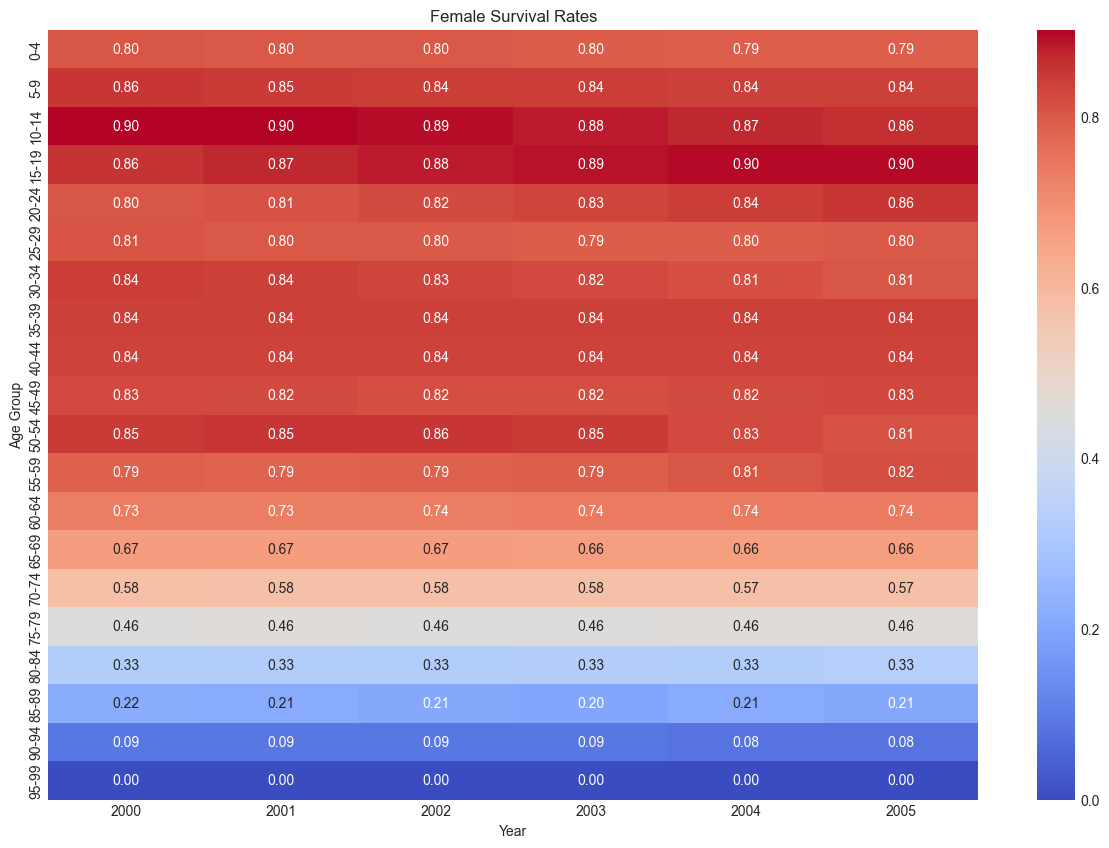

In [15]:
# Heatmap for female survival rates
plt.figure(figsize=(15, 10))
sns.heatmap(female_sr_df.drop(columns=["Year"]).T, cmap="coolwarm", xticklabels=female_sr_df["Year"], yticklabels=[f"{i}-{i+4}" for i in range(0, 100, 5)], annot=True, fmt=".2f")
plt.title("Female Survival Rates")
plt.xlabel("Year")
plt.ylabel("Age Group")
plt.show()


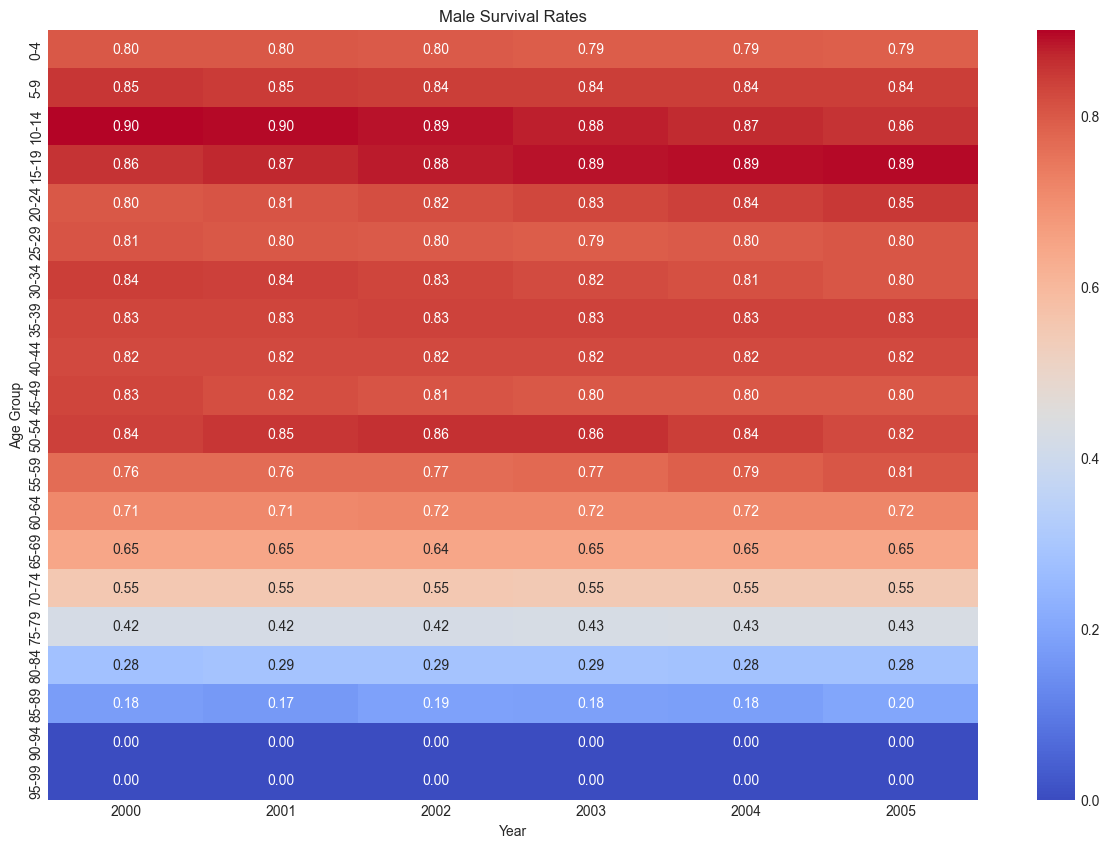

In [16]:
# Heatmap for male survival rates
plt.figure(figsize=(15, 10))
sns.heatmap(male_sr_df.drop(columns=["Year"]).T, cmap="coolwarm", xticklabels=female_sr_df["Year"], yticklabels=[f"{i}-{i+4}" for i in range(0, 100, 5)], annot=True, fmt=".2f")
plt.title("Male Survival Rates")
plt.xlabel("Year")
plt.ylabel("Age Group")
plt.show()


## 2. Determine the fertility rate for women in the age category 20-24,	25-29,	30-34, and	35-39

Data source: https://population.un.org/wpp/Download/Standard/CSV/

<!-- Equations for modeling -->

Age-Specific Fertility rate (ASFR) = (number of live births in an age group) / (number of women in the same age group) * 1000

<!-- Define input/output data and parameters -->

Input: constant-fertility female data (number of live births) and female population data
Output: fertility rate for each age group (20-24, 25-29, 30-34, and 35-39)

In [17]:
fertility_data = [
    [2000, "20-24", 1348.856],
    [2000, "25-29", 1220.635],
    [2000, "30-34", 909.096],
    [2000, "35-39", 586.341],
    [2001, "20-24", 1361.275],
    [2001, "25-29", 1274.3],
    [2001, "30-34", 950.438],
    [2001, "35-39", 599.798],
    [2002, "20-24", 1390.072],
    [2002, "25-29", 1313.022],
    [2002, "30-34", 972.281],
    [2002, "35-39", 608.354],
    [2003, "20-24", 1394.4],
    [2003, "25-29", 1351.359],
    [2003, "30-34", 1012.944],
    [2003, "35-39", 611.213],
    [2004, "20-24", 1432.715],
    [2004, "25-29", 1401.216],
    [2004, "30-34", 1047.308],
    [2004, "35-39", 622.105],
    [2005, "20-24", 1465.523],
    [2005, "25-29", 1445.378],
    [2005, "30-34", 1081.598],
    [2005, "35-39", 637.179]
]

fertility_df = pd.DataFrame(fertility_data, columns=["Year", "Age Group", "Births"])


Now, to calculate the fertility rate, we need to divide the number of births in each age group by the female population in that age group for the same year.

In [18]:
# The age groups present in both DataFrames
common_age_groups = ["20-24", "25-29", "30-34", "35-39"]

# Calculate and return the fertility rate
# return births / female_population

def calculate_fertility_rate(year, age_group):
    female_population = female_df.loc[female_df["Year"] == year, age_group].iloc[0]
    births = fertility_df.loc[(fertility_df["Year"] == year) & (fertility_df["Age Group"] == age_group), "Births"].iloc[0]
    
    return births / female_population

# Initialize an empty list to store fertility rates for each year
fertility_rates = []

# Loop through the years 2000 to 2005
for year in range(2000, 2006):
    year_fertility_rates = {"Year": year}
    
    # Loop through the common age groups
    for age_group in common_age_groups:
        # Calculate and store the fertility rate for the current year and age group
        year_fertility_rates[age_group] = calculate_fertility_rate(year, age_group)
    # Add the fertility rates for the current year to the list
    fertility_rates.append(year_fertility_rates)

# Convert the list of fertility rates into a DataFrame
fertility_rate_df = pd.DataFrame(fertility_rates)

In [19]:
fertility_rate_df

,Year,20-24,25-29,30-34,35-39
0,2000,0.239754,0.269575,0.247913,0.189264
1,2001,0.234743,0.270609,0.251572,0.188913
2,2002,0.233194,0.268292,0.249047,0.187071
3,2003,0.228216,0.265754,0.250667,0.183437
4,2004,0.229418,0.265734,0.249716,0.182062
5,2005,0.230283,0.265353,0.248130,0.181532


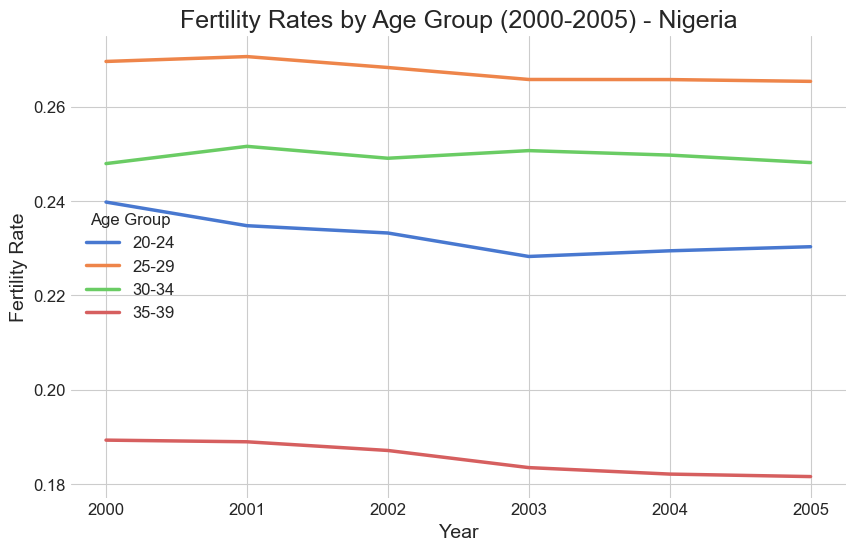

In [20]:
# Set the style and palette
sns.set_style("whitegrid")
sns.set_palette("muted")

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
for age_group in common_age_groups:
    sns.lineplot(data=fertility_rate_df, x="Year", y=age_group, label=age_group, linewidth=2.5)

# Customize the plot
ax.set_title("Fertility Rates by Age Group (2000-2005) - Nigeria", fontsize=18)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Fertility Rate", fontsize=14)
ax.legend(title="Age Group", fontsize=12, title_fontsize=12)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()


## 3.vIn our next task, we Calculate boys/girls ratio for newborn children.

<!-- Equations for modeling: -->

boys/girls ratio = (number of newborn boys) / (number of newborn girls)

<!-- Input/output data and parameters: -->

Input data: number of newborn boys and girls in each year
Output data: boys/girls ratio for each year

We will use the previously defined female_data and male_data for the number of newborns in each year. The number of newborns can be found in the "0-4" age group. 

In [21]:
# Function to calculate boys/girls ratio for a given year
def calculate_boys_girls_ratio(year):
    # Get the number of newborn boys and girls for the specified year
    newborn_boys = male_df.loc[male_df["Year"] == year, "0-4"].iloc[0]
    newborn_girls = female_df.loc[female_df["Year"] == year, "0-4"].iloc[0]
    
    # Calculate and return the boys/girls ratio
    return newborn_boys / newborn_girls

# Initialize an empty list to store boys/girls ratios for each year
boys_girls_ratios = []

# Loop through the years 2000 to 2005
for year in range(2000, 2006):
    # Calculate and store the boys/girls ratio for the current year
    boys_girls_ratios.append({"Year": year, "Boys/Girls Ratio": calculate_boys_girls_ratio(year)})

# Convert the list of boys/girls ratios into a DataFrame
boys_girls_ratio_df = pd.DataFrame(boys_girls_ratios)


In [22]:
boys_girls_ratio_df

,Year,Boys/Girls Ratio
0,2000,1.030231
1,2001,1.030178
2,2002,1.030041
3,2003,1.029762
4,2004,1.029579
5,2005,1.030003


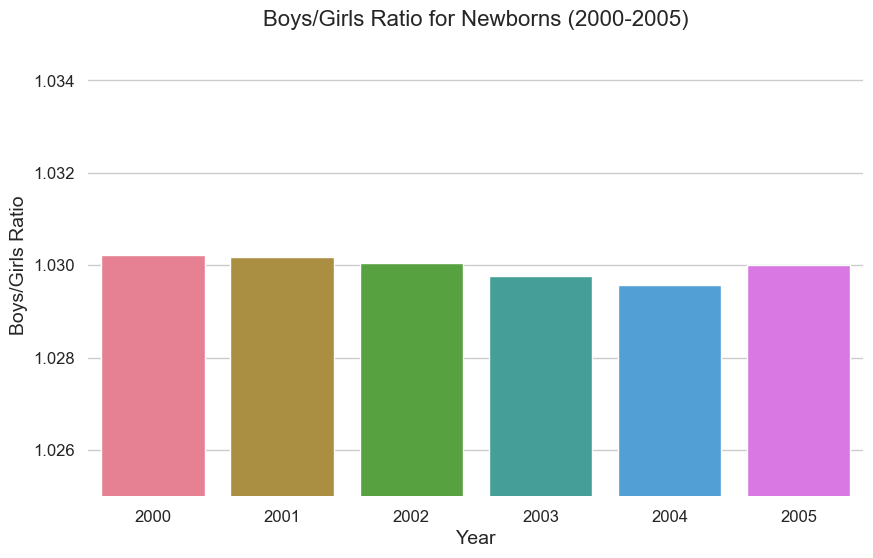

In [23]:
# Set the style and color palette for the plot
sns.set(style="whitegrid")
sns.set_palette("husl")

# Create a bar plot of the boys/girls ratio data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Year", y="Boys/Girls Ratio", data=boys_girls_ratio_df)

# Set the title, x-axis label, and y-axis label for the plot
ax.set_title("Boys/Girls Ratio for Newborns (2000-2005)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Boys/Girls Ratio", fontsize=14)

# Customize the appearance of the plot
sns.despine(left=True, bottom=True)
ax.yaxis.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the y-axis limits to zoom in on the small differences
ax.set_ylim(1.025, 1.035)

# Show the plot
plt.show()

## 4. Predict the change in the country's population and demographic profile for 100 years and compare with existing predictions!

<!-- Equations for modeling: -->

Population in the future = Population in the present * Survival rate (for mortality) * (1 + fertility rate) (for fertility)

<!-- input/output data and parameters: -->

Input data: fertility rates, survival rates, initial population
Output data: projected population

<!-- Currently, we have the following DataFrames at our disposal: -->

female_df: This DataFrame contains female population data by age groups for the years 2000 to 2005.

male_df: This DataFrame contains male population data by age groups for the years 2000 to 2005.

female_sr_df: This DataFrame contains female survival rates by age groups for the years 2000 to 2005.

male_sr_df: This DataFrame contains male survival rates by age groups for the years 2000 to 2005.

fertility_df: This DataFrame contains fertility data (number of births) by age groups for the years 2000 to 2005.

fertility_rate_df: This DataFrame contains fertility rates by age groups for the years 2000 to 2005.

boys_girls_ratio_df: This DataFrame contains the boys/girls ratio for newborn children for the years 2000 to 2005.

<!-- Procedure -->

1. Start with the initial population data for the year 2005

2. For each year, calculate the number of survivors for each age group using the survival rates.

3. Calculate the number of births for each year using fertility rates and the female population in each age group.

4. Update the population data by adding newborns and removing deceased individuals.
Repeat steps 2-4 for 100 years.

In [24]:
def project_population(years_to_project):
    # Start with the initial population data for the year 2005
    latest_year = 2005
    projected_female_pop = female_df[female_df["Year"] == latest_year].iloc[0].drop("Year")
    projected_male_pop = male_df[male_df["Year"] == latest_year].iloc[0].drop("Year")

    population_projection = [{"Year": latest_year, "Female Population": projected_female_pop, "Male Population": projected_male_pop}]

    for i in range(1, years_to_project + 1):
        current_year = latest_year + i
        
        # Calculate survivors using survival rates
        female_survivors = projected_female_pop[:-1].multiply(female_sr_df[female_sr_df["Year"] == latest_year].iloc[0].drop("Year")[:-1])
        male_survivors = projected_male_pop[:-1].multiply(male_sr_df[male_sr_df["Year"] == latest_year].iloc[0].drop("Year")[:-1])

        # Calculate births using fertility rates
        births = 0
        for age_group in common_age_groups:
            fertility_rate = fertility_rate_df.loc[fertility_rate_df["Year"] == latest_year, age_group].iloc[0]
            female_population_age_group = projected_female_pop[age_group]
            births += fertility_rate * female_population_age_group
        
        # Calculate the number of boys and girls using the boys/girls ratio
        boys_girls_ratio = boys_girls_ratio_df.loc[boys_girls_ratio_df["Year"] == latest_year, "Boys/Girls Ratio"].iloc[0]
        boys = births * boys_girls_ratio / (1 + boys_girls_ratio)
        girls = births - boys
        
        # Update the population data
        projected_female_pop = pd.concat([pd.Series(girls), female_survivors]).reset_index(drop=True)
        projected_male_pop = pd.concat([pd.Series(boys), male_survivors]).reset_index(drop=True)
        
        population_projection.append({"Year": current_year, "Female Population": projected_female_pop, "Male Population": projected_male_pop})
    
    return population_projection

# years_to_project = 100
# population_projection = project_population(years_to_project)
